In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


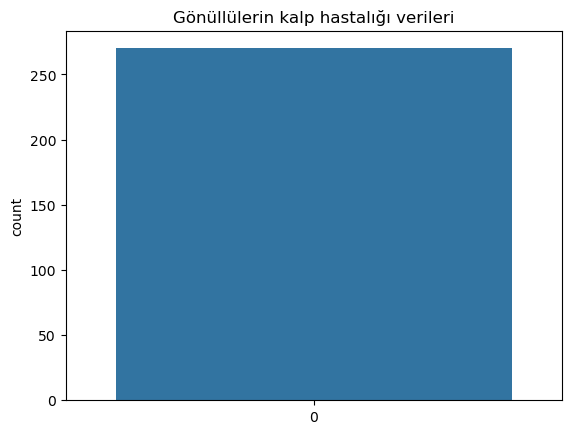

In [25]:
dtf = pd.read_csv("heart_v2.csv")
print(dtf.head())
sns.countplot(dtf['heart disease'])
plt.title('Gönüllülerin kalp hastalığı verileri')
plt.show()


In [26]:
X = dtf.drop('heart disease', axis = 1)
y = dtf['heart disease']


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape


((189, 4), (81, 4))

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
%time classifier_rf.fit(X_train, y_train)


CPU times: user 281 ms, sys: 104 ms, total: 385 ms
Wall time: 115 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [29]:
classifier_rf.oob_score_


0.656084656084656

In [30]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
	'max_depth' : [2, 3, 5, 10, 20],
	'min_samples_leaf' : [5, 10, 20, 50, 100, 200],
	'n_estimators' : [10, 25, 30, 50, 100, 200]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
						   param_grid=params,
						   cv=4,
						   n_jobs=-1,
						   verbose=1, scoring='accuracy')
%time grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 330 ms, sys: 104 ms, total: 434 ms
Wall time: 9.12 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
grid_search.best_score_


0.6985815602836879

In [32]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

[Text(0.6, 0.9166666666666666, 'cholestrol <= 301.0\ngini = 0.5\nsamples = 114\nvalue = [97, 92]\nclass = Disease'),
 Text(0.5, 0.75, 'age <= 54.5\ngini = 0.498\nsamples = 99\nvalue = [77, 86]\nclass = No Disease'),
 Text(0.2, 0.5833333333333334, 'sex <= 0.5\ngini = 0.447\nsamples = 51\nvalue = [55, 28]\nclass = Disease'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [24, 0]\nclass = Disease'),
 Text(0.3, 0.4166666666666667, 'age <= 48.5\ngini = 0.499\nsamples = 37\nvalue = [31, 28]\nclass = Disease'),
 Text(0.2, 0.25, 'cholestrol <= 230.0\ngini = 0.48\nsamples = 21\nvalue = [14, 21]\nclass = No Disease'),
 Text(0.1, 0.08333333333333333, 'gini = 0.465\nsamples = 11\nvalue = [7, 12]\nclass = No Disease'),
 Text(0.3, 0.08333333333333333, 'gini = 0.492\nsamples = 10\nvalue = [7, 9]\nclass = No Disease'),
 Text(0.4, 0.25, 'gini = 0.413\nsamples = 16\nvalue = [17, 7]\nclass = Disease'),
 Text(0.8, 0.5833333333333334, 'age <= 61.5\ngini = 0.399\nsamples = 48\nvalue = [22

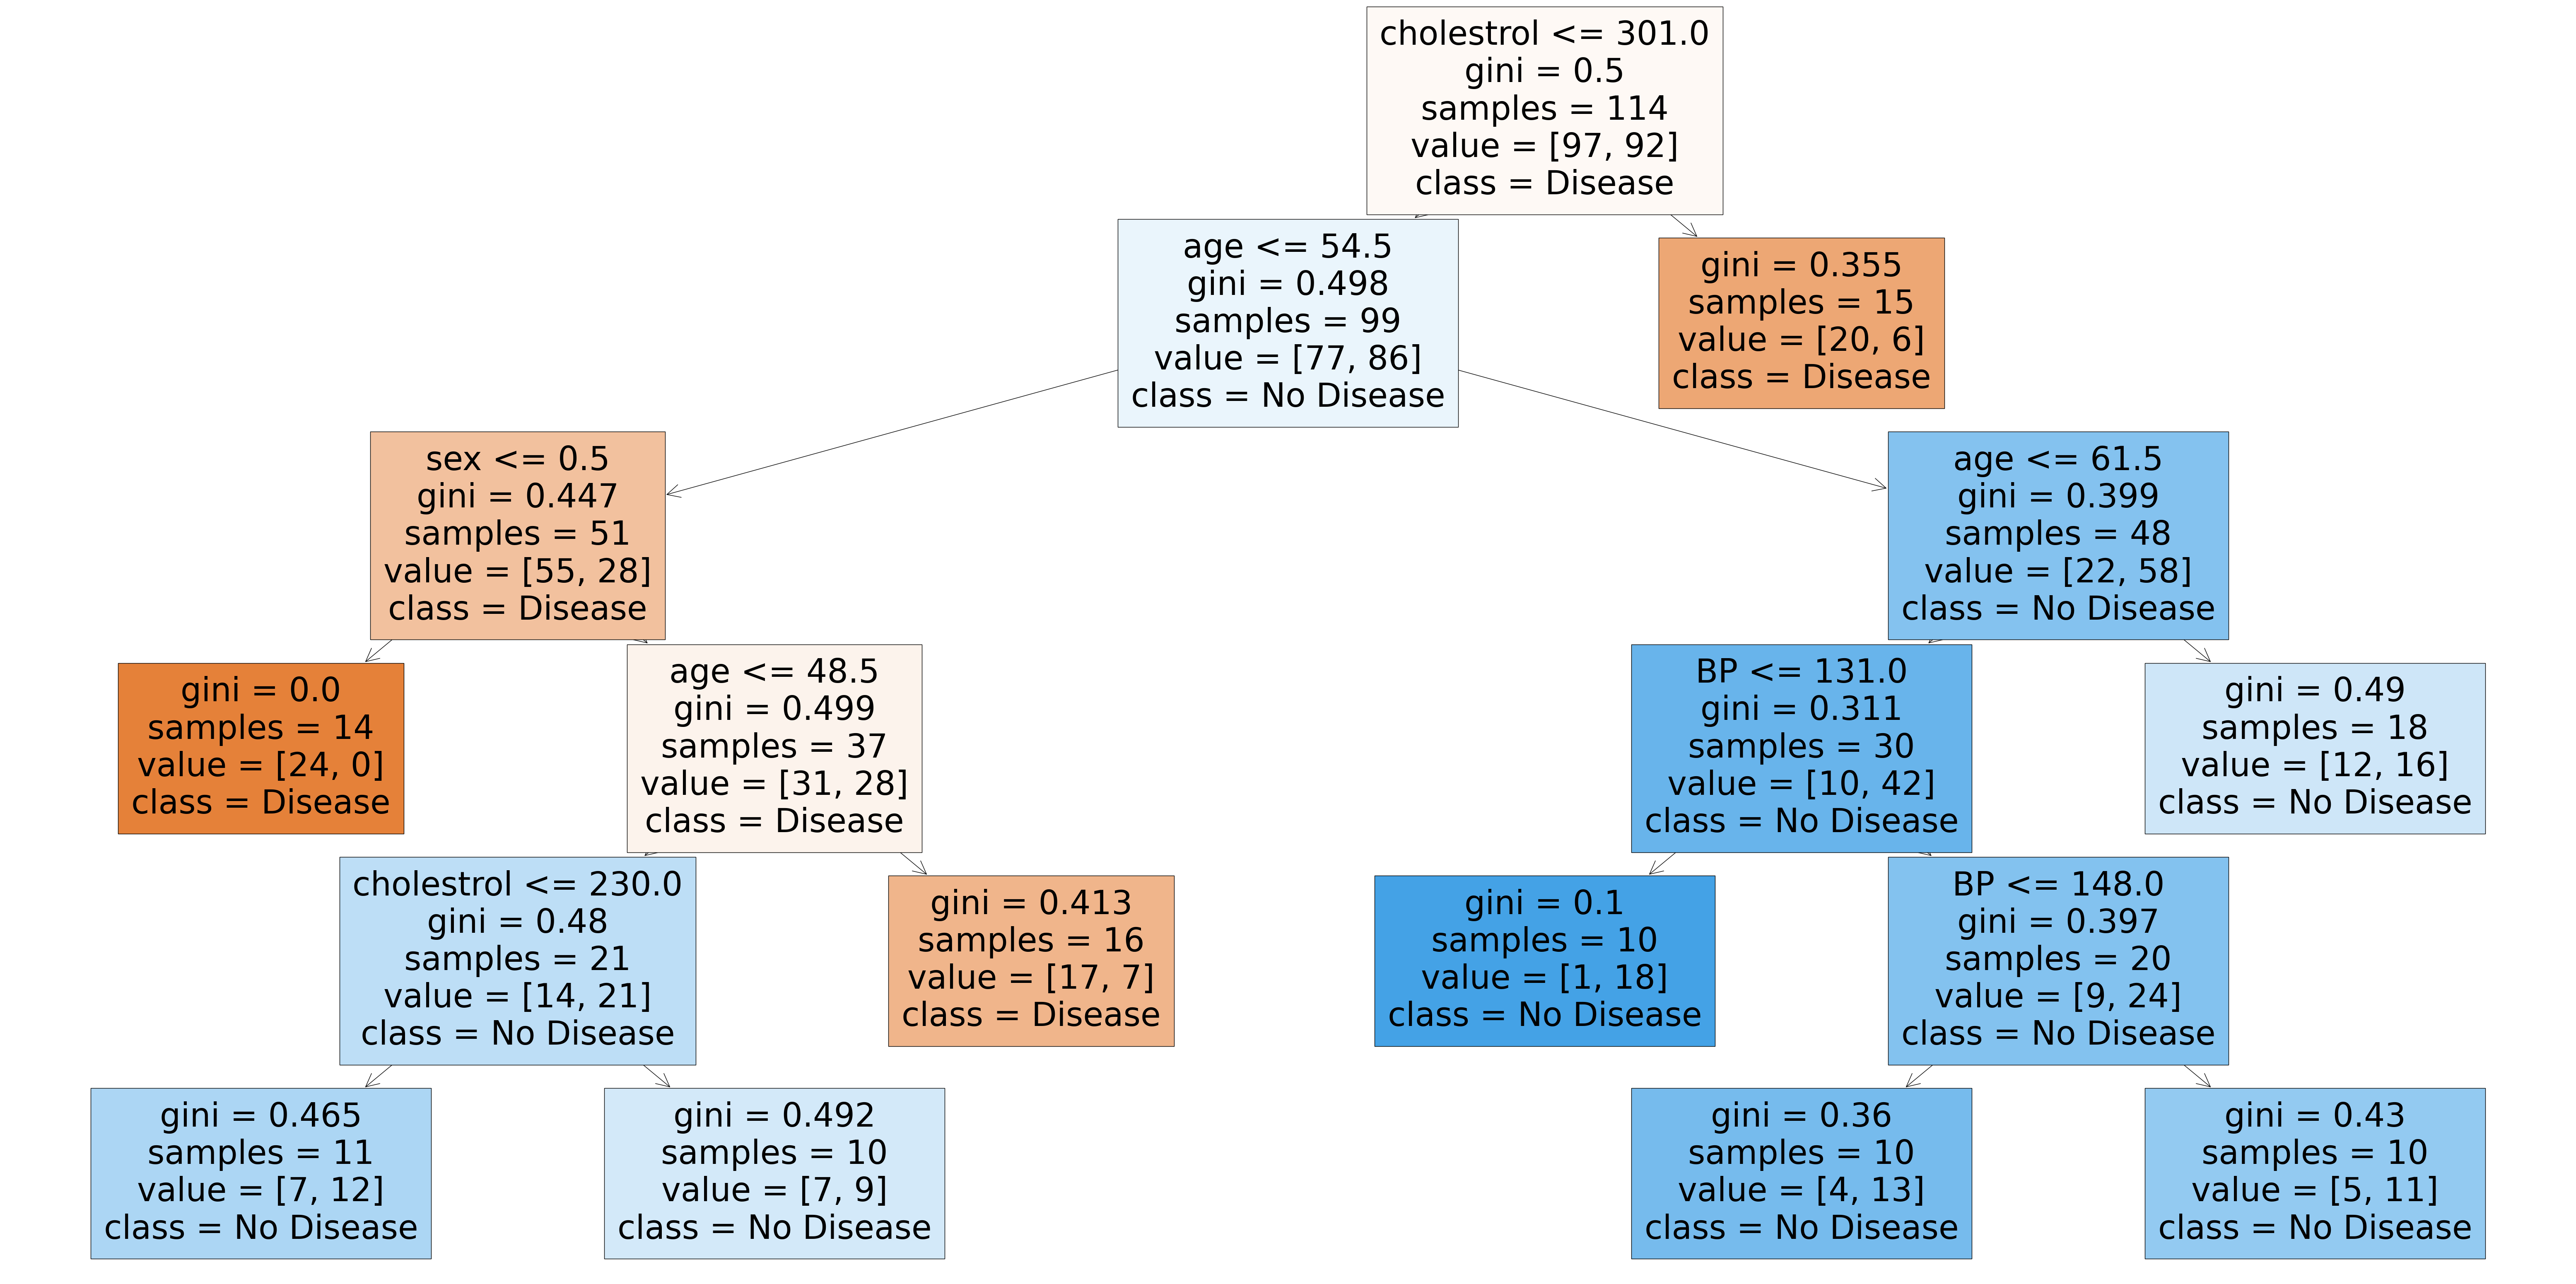

In [33]:
from sklearn.tree import plot_tree

# Karar ağacını çizdirme
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[5], feature_names=X.columns, class_names=["Disease", "No Disease"], filled=True)


[Text(0.4375, 0.9, 'age <= 54.5\ngini = 0.496\nsamples = 122\nvalue = [103, 86]\nclass = Disease'),
 Text(0.1875, 0.7, 'sex <= 0.5\ngini = 0.395\nsamples = 55\nvalue = [62, 23]\nclass = Disease'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [19, 0]\nclass = Disease'),
 Text(0.25, 0.5, 'BP <= 127.0\ngini = 0.454\nsamples = 42\nvalue = [43, 23]\nclass = Disease'),
 Text(0.125, 0.3, 'BP <= 115.0\ngini = 0.49\nsamples = 20\nvalue = [16, 12]\nclass = Disease'),
 Text(0.0625, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.1875, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.375, 0.3, 'cholestrol <= 243.5\ngini = 0.411\nsamples = 22\nvalue = [27, 11]\nclass = Disease'),
 Text(0.3125, 0.1, 'gini = 0.48\nsamples = 12\nvalue = [12, 8]\nclass = Disease'),
 Text(0.4375, 0.1, 'gini = 0.278\nsamples = 10\nvalue = [15, 3]\nclass = Disease'),
 Text(0.6875, 0.7, 'sex <= 0.5\ngini = 0.478\nsamples = 67\nvalue = [41, 63]\nclass = No Disea

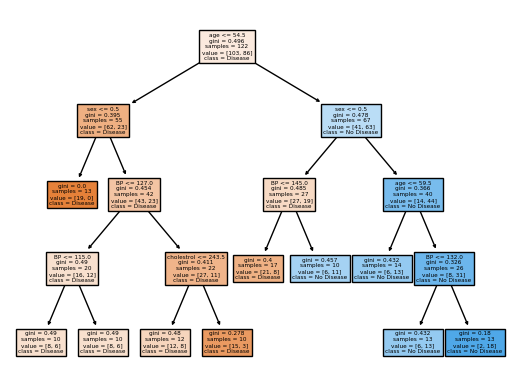

In [34]:
plot_tree(rf_best.estimators_[7], feature_names=X.columns, class_names=["Disease", "No Disease"], filled=True)


In [35]:
rf_best.feature_importances_


array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [36]:
imp_dtf = pd.DataFrame({
	"Değişken Adı":X_train.columns,
	"En Önemli Özellik":rf_best.feature_importances_
})

imp_dtf.sort_values(by="En Önemli Özellik", ascending=False)


,Değişken Adı,En Önemli Özellik
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
